<h2><b>Comparing some fundamental regression methods</b></h2>

In this notebook, we will try to predict the "Chance of Admit" data by using some of fundamental regression methods, which are Linear Regression, Multiple Linear Regression, Decision Tree Regression and Random Forest Regression.

<h4><i>Importing the required libraries</i></h4>

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h4><i>Preparing the dataset</i><h4>

In [100]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1C63iWkwFx4eCAUqLfKg9rYoBpz63KfujUev1-ETxbkf',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmit-donotdelete-pr-0k8hmantti6tge'
object_key = 'Dataset.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<h4><i>Creating a correlation matrix</i></h4>

In [101]:
corr_matrix = df.corr()
corr_matrix

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


We create a correlation matrix to observe the effects of 'Chance of Admit'

Visualizing using a heat map

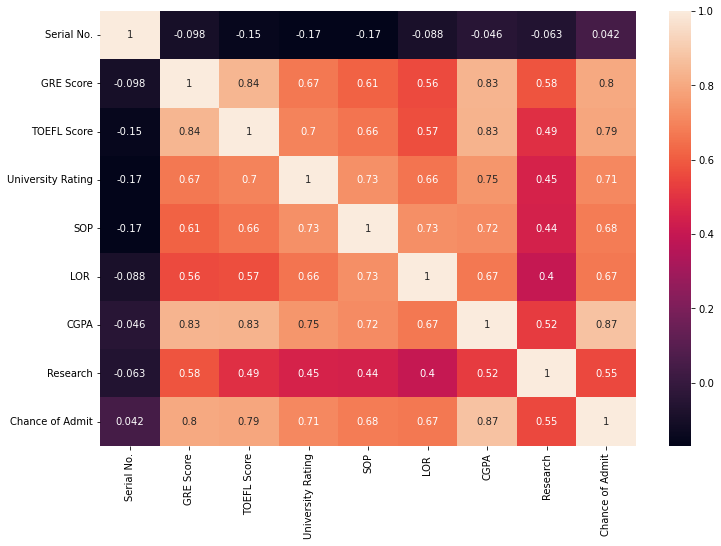

In [102]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

Plotting in relplot to find which has the highest correlation

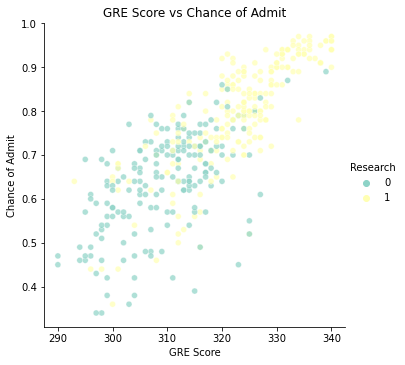

In [103]:
sns.relplot(data=df,x="GRE Score",y="Chance of Admit",hue="Research",palette="Set3",alpha=0.7)
plt.title("GRE Score vs Chance of Admit")
plt.show()

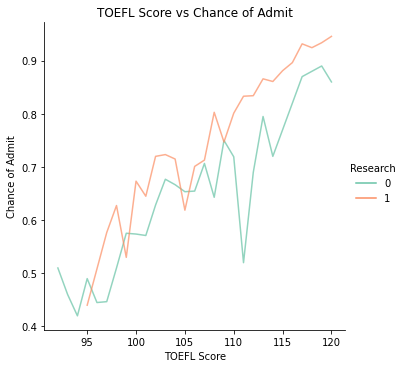

In [104]:
sns.relplot(data=df,x="TOEFL Score",y="Chance of Admit",hue="Research",palette="Set2",alpha=0.7,kind="line",ci=None)
plt.title("TOEFL Score vs Chance of Admit")
plt.show()

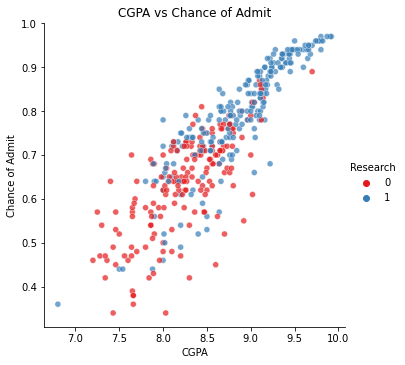

In [105]:
sns.relplot(data=df,x="CGPA",y="Chance of Admit",hue="Research",palette="Set1",alpha=0.7)
plt.title("CGPA vs Chance of Admit")
plt.show()

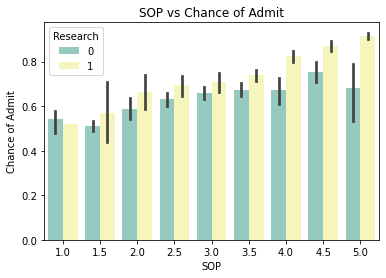

In [106]:
sns.barplot(data=df,x="SOP",y="Chance of Admit",palette="Set3",hue="Research")
plt.title("SOP vs Chance of Admit")
plt.show()

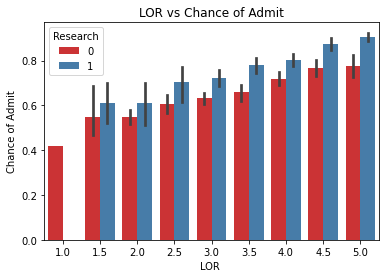

In [107]:
sns.barplot(data=df,x="LOR ",y="Chance of Admit",palette="Set1",hue="Research")
plt.title("LOR vs Chance of Admit")
plt.show()

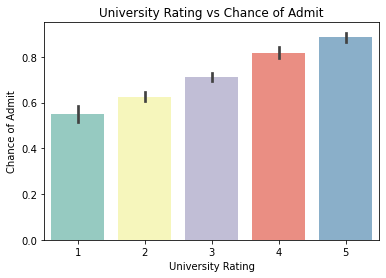

In [108]:
sns.barplot(data=df,x="University Rating",y="Chance of Admit",palette="Set3")
plt.title("University Rating vs Chance of Admit")
plt.show()

As linear relationship between them are observed, linear regression method can be used. The 'Chance of Admit' is depended on more than one data it is more appropriate to apply multiple linear regression than single linear regression

<h4><i>Importing the required libraries for regression analyzes</i></h4>

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

<h4><i>Spliting the dataset into training and testing data</i></h4>

In [110]:
x = df[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA", "Research"]]
y = df["Chance of Admit"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

<h4><i>Multiple Linear Regression</i></h4>

In [111]:
multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's Score = {:.3f}".format(r2_score_mlr))

Mutiple Linear Regression's Score = 0.821


<h4><i>Decision Tree Regression</i></h4>

In [112]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

y_pred_tree = tree_reg.predict(x_test)

r2_score_tree = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's Score = {:.3f}".format(r2_score_tree))

Decision Tree Regression's Score = 0.661


<h4><i>Random Tree Regression</i></h4>

In [113]:
ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=42)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2_score_rfr))

Random Forest Regression's Score = 0.807


<h4><i>Conclusion</i></h4>

r2_score represents the accuracy of the regression models. As the accuracy of the multiple linear regression is close to 1, it is better than decision tree regression and random tree regression

<h4><i>Deploying using ML Service</i></h4>

In [114]:
!pip install ibm_watson_machine_learning

In [115]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "CB8dTF8Y0_o4amdiEL2FfNBLZ-EdGUGdLqrDk7Z2gzDP"
}

client = APIClient(wml_credentials)

<h4><i>Creating Deployment Space</i></h4>

In [116]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [117]:
space_uid = guid_from_space_name(client, 'Regression-Models')
print("Space UID = " + space_uid)

Space UID = fccf9bb0-2d96-46c9-a5f0-c7026edf7ad3


In [118]:
client.set.default_space(space_uid)

'SUCCESS'

In [119]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

<h4><i>Deploying the model in IBM cloud using Multiple Regression Model </i></h4>

In [120]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [121]:
model_details = client.repository.store_model(model = multiple_lin_reg, meta_props={
    client.repository.ModelMetaNames.NAME: "UAEP_Multiple_Linear_Regression",
    client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}
)

model_id = client.repository.get_model_id(model_details)
model_id

'a4adbc4c-08b4-4894-af1e-32f923a35747'

<h4><i>Testing</i></h4>

In [122]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [123]:
multiple_lin_reg.predict(x_train)

array([[0.74604196],
       [0.73901061],
       [0.99499641],
       [0.71465428],
       [0.58666289],
       [0.70570088],
       [0.79635618],
       [0.72390065],
       [0.91430317],
       [0.65782685],
       [0.60293691],
       [0.84357917],
       [0.49457813],
       [0.72066904],
       [0.61590143],
       [0.63303675],
       [0.73458027],
       [0.77284896],
       [0.54224384],
       [0.7740777 ],
       [0.67388358],
       [0.68770413],
       [0.71751013],
       [0.79218791],
       [0.74689676],
       [0.60135562],
       [0.6550291 ],
       [0.65024192],
       [0.64937148],
       [0.61847543],
       [0.71837168],
       [0.62572932],
       [0.56180503],
       [0.58932197],
       [0.82917531],
       [0.60765804],
       [0.45309083],
       [0.88506537],
       [0.772133  ],
       [0.81857796],
       [0.62930747],
       [0.705755  ],
       [0.6604701 ],
       [0.44720981],
       [0.9565852 ],
       [0.79082941],
       [0.7826623 ],
       [0.656

<h4><i>Multiple Linear Regression Model Deployment Test</i></h4>

In [125]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "CB8dTF8Y0_o4amdiEL2FfNBLZ-EdGUGdLqrDk7Z2gzDP"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"field": [["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA"]], "values": [[326, 110, 2, 3.5, 4, 9.23]]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/f68fb233-7af6-473e-8e77-0b1ca625695f/predictions?version=2022-11-18', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'predictions': [{'fields': ['prediction'], 'values': [[[0.8274874358563875]]]}]}


In [126]:
probability = response_scoring.json()['predictions'][0]['values'][0][0][0]
probability

0.8274874358563875